In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_data = pd.read_csv('./kaggle_data/data.csv', delimiter=',')
df_data_w_generes = pd.read_csv('./kaggle_data/data_w_genres.csv', delimiter=',')
df_data_by_artist = pd.read_csv('./kaggle_data/data_by_artist.csv', delimiter=',')
df_data_by_genres = pd.read_csv('./kaggle_data/data_by_genres.csv', delimiter=',')
df_data_by_year = pd.read_csv('./kaggle_data/data_by_year.csv', delimiter=',')


# Korelacja

In [2]:
df_data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


Najwyzsza korelacje osigaja cechy Year i Popularity ~ 0.88

chcemy miec zarowno Year jak i Popularity wiec nie laczymy zadnych danych

# Wybór cech

In [3]:
df_new = df_data.copy()

df_new = df_new.drop(columns=['id',
                              'acousticness',
                              'explicit',
                              'energy',
                              'release_date',
                              'mode',
                              'key',
                              'loudness'])
df_new.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year
0,['Carl Woitschach'],0.708,158648,0.563,0.1510,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.901,0.0763,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,['Seweryn Goszczyński'],0.749,104300,0.000,0.1190,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,['Francisco Canaro'],0.781,180760,0.887,0.1110,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.908,0.0980,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


# Wykresy Wstępne do czyszczenia danych

## Duration

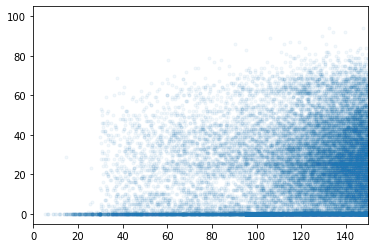

In [4]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.popularity
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

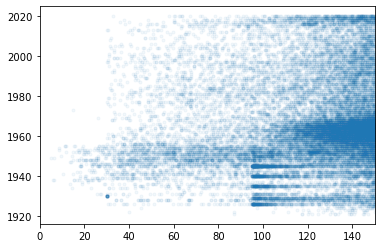

In [5]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.year
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

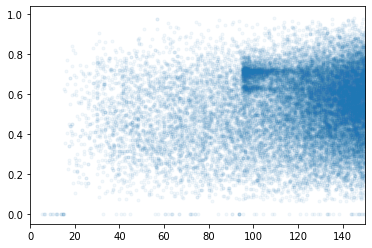

In [6]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.danceability
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

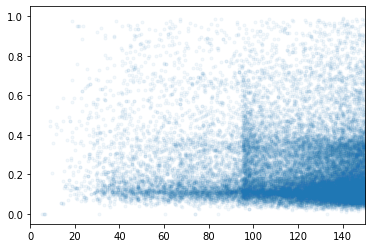

In [7]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.liveness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

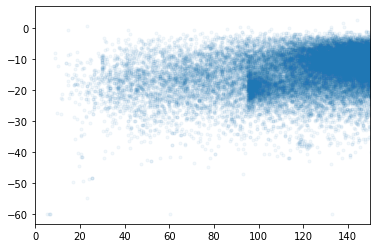

In [8]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.loudness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

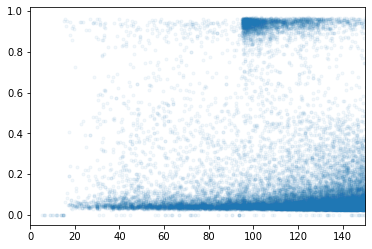

In [9]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.speechiness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

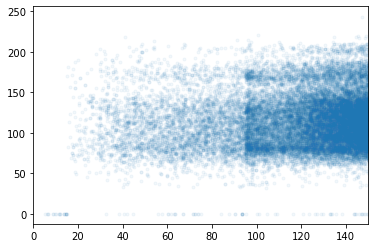

In [10]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.tempo
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

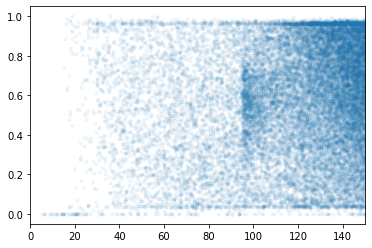

In [11]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.valence
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

## Popularity

In [12]:
def divider0_100(a):
    if(a==0):
        sectors[0] += 1
    elif(a < 20):
        sectors[1] += 1
    elif(a < 40):
        sectors[2] += 1
    elif(a < 60):
        sectors[3] += 1
    elif(a < 80):
        sectors[4] += 1
    else:
        sectors[5] += 1

def divider(a):
    if(a < 0.2):
        sectors[0] += 1
    elif(a < 0.4):
        sectors[1] += 1
    elif(a < 0.6):
        sectors[2] += 1
    elif(a < 0.8):
        sectors[3] += 1
    else:
        sectors[4] += 1

[27357, 24265, 50341, 50637, 16737, 572]

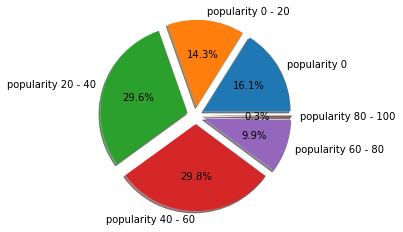

In [13]:
sectors = [0,0,0,0,0,0]

x = df_data.popularity

labels = ['popularity 0',
          'popularity 0 - 20',
          'popularity 20 - 40',
          'popularity 40 - 60',
          'popularity 60 - 80',
          'popularity 80 - 100']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
for a in x:
    divider0_100(a)

plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
sectors

In [14]:
df_temp = df_data.copy()

df_temp.drop(df_temp[df_temp.popularity != 0].index, inplace=True)

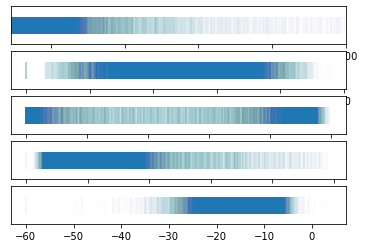

In [15]:
plt.subplot(5, 1, 1)

x = df_temp.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(90, 1000)
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 2)

x = df_temp.danceability
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 3)

x = df_temp.instrumentalness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 4)

x = df_temp.liveness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 5)

x = df_temp.loudness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

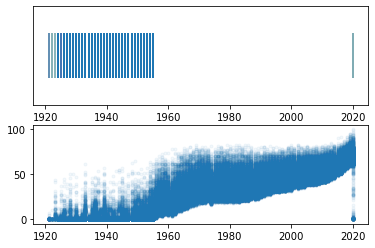

In [16]:
plt.subplot(2, 1, 1)
x = df_temp.year
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(2, 1, 2)
x = df_data.year
y = df_data.popularity
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

# Data by year

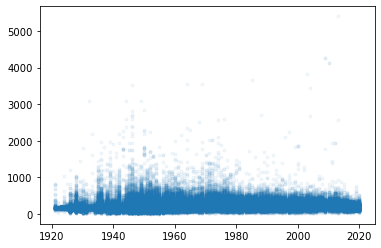

In [17]:
x = df_data.year
y = df_data.duration_ms
y = list(map(lambda a: a/1000, y))
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

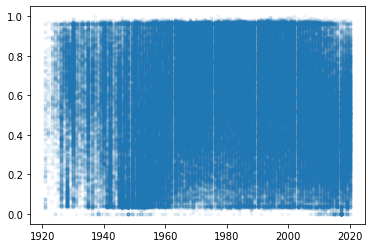

In [18]:
x = df_data.year
y = df_data.valence
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

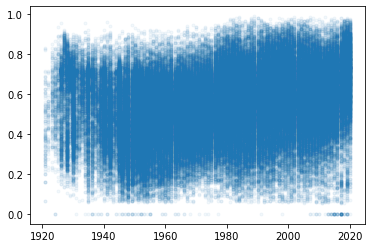

In [19]:
x = df_data.year
y = df_data.danceability
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

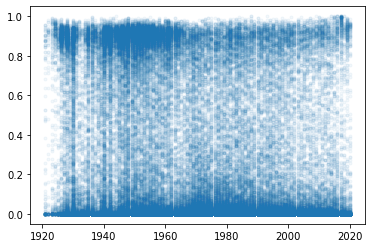

In [20]:
x = df_data.year
y = df_data.instrumentalness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

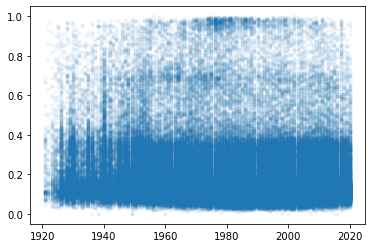

In [21]:
x = df_data.year
y = df_data.liveness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

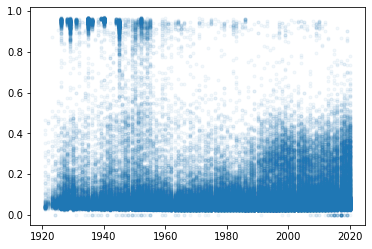

In [22]:
x = df_data.year
y = df_data.speechiness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

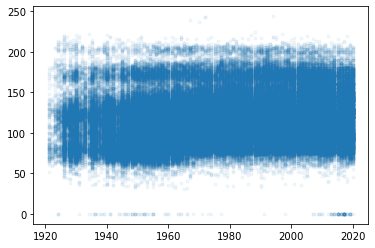

In [23]:
x = df_data.year
y = df_data.tempo
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

# Czyszczenie danych

In [24]:
df_new.drop(df_new[df_new.duration_ms < 90000].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0]/ df_data.shape[0]}%")

Wszystkie dane: 169909
Zachowane dane: 165877
Usuniety % wszystkich rekordów: 0.023730349775468063%


In [25]:
temp = df_new.shape[0]
df_new.drop(df_new[df_new.popularity == 0].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0] / df_data.shape[0]}%")
print("wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 90 i pop = 0")

Wszystkie dane: 169909
Zachowane dane: 140129
Usuniety % wszystkich rekordów: 0.17527029174440434%
wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 90 i pop = 0


In [26]:
df_new[(df_new.danceability == 0) & (df_new.instrumentalness == 0) & (df_new.tempo == 0)]

,artists,danceability,duration_ms,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year
26077,['The Platters'],0.0,127093,0.0,0.159,A Tisket A Tasket,16,0.0,0.0,0.0,1959
26491,['Willie Nelson'],0.0,147170,0.0,0.233,Half A Man,15,0.0,0.0,0.0,1963
41981,['Connie Francis'],0.0,179466,0.0,0.000,Hava Nagilah,12,0.0,0.0,0.0,1960
43098,['José Alfredo Jimenez'],0.0,144760,0.0,0.491,Yo Debí Enamorarme de Tu Madre,28,0.0,0.0,0.0,1971
61972,['Atlas Fret'],0.0,132827,0.0,0.000,(silent track),40,0.0,0.0,0.0,2007
63451,"['Pearl Bailey', 'Mitchell Ayres & Jazz Band']",0.0,192130,0.0,0.123,Tired,4,0.0,0.0,0.0,1948
64593,['Connie Francis'],0.0,253719,0.0,0.000,My Yiddishe Momme,12,0.0,0.0,0.0,1960
70154,['Fans & White Noise'],0.0,203703,0.0,0.112,White Noise: Fan,52,0.0,0.0,0.0,2015
79679,['Billie Holiday'],0.0,159600,0.0,0.247,Back In Your Own Backyard - Take 1,15,0.0,0.0,0.0,1937
100219,"['Giuseppe Verdi', 'Emil Cooper', 'Metropolita...",0.0,116133,0.0,0.232,La donne è mobile from Rigoletto - Vocal,10,0.0,0.0,0.0,1949


In [27]:
df_new.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.9080,0.098,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
40,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.6970,0.231,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,0.0331,80.622,0.0479,1928
42,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.9030,0.106,"Nocturne F Minor, Op. 55, No. 1",2,0.0322,72.133,0.1350,1928
47,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.8250,0.153,"Mazurka in F Minor, Op. 7, No. 3",2,0.0329,84.551,0.2760,1928
59,['Ted Weems & His Orchestra'],0.839,162147,0.0419,0.104,"Chick, Chick, Chick, Chick, Chicken - Lay A Li...",1,0.0800,115.063,0.9760,1928


# Podstawowe wykresy

[4001, 24211, 55460, 47010, 9447]

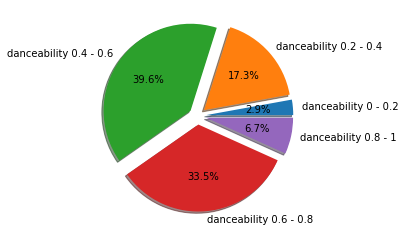

In [28]:
sectors = [0,0,0,0,0]

x = df_new.danceability

labels = ['danceability 0 - 0.2',
          'danceability 0.2 - 0.4',
          'danceability 0.4 - 0.6',
          'danceability 0.6 - 0.8',
          'danceability 0.8 - 1']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
for a in x:
    divider(a)

plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
sectors

# Eleme